Here, I do the following things:

1. Frequency Analysis
2. Noise Filtering
3. Amplitude Spectrum Extraction

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import pywt

In [7]:
data_dayton = pd.read_csv('/content/drive/MyDrive/hourlyconsumptiondataset/DAYTON_hourly.csv')
data_dayton.head()

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0


In [36]:
data_dayton.describe()

,DAYTON_MW
count,121275.000000
mean,2037.851140
std,393.403153
min,982.000000
25%,1749.000000
50%,2009.000000
75%,2279.000000
max,3746.000000


In [14]:
y = data_dayton['DAYTON_MW']
print(type(y))
y = np.array(y)
print(type(y))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[1596. 1517. 1486. ... 2664. 2614. 2552.]


In [16]:
#Trying it a different way
y= np.array(data_dayton.DAYTON_MW)
print(y)
print(type(y))

[1596. 1517. 1486. ... 2664. 2614. 2552.]
<class 'numpy.ndarray'>


In [19]:
#What would be the data type if I had done a bit differently
y = data_dayton.DAYTON_MW
print(type(y))

<class 'pandas.core.series.Series'>


I concluded that doing data_dayton['DAYTON_MW'] and data_dayton.DAYTON _MW gives the same kind of data type i.e. pandas.core.series.Series datatype. And if I have to change it to a numpy array I have to np.array() to it.

In [22]:
x = data_dayton.index
print(type(x))
print(x)

<class 'pandas.core.indexes.range.RangeIndex'>
RangeIndex(start=0, stop=121275, step=1)


In [31]:
datearray = data_dayton.Datetime
print(datearray)

0         2004-12-31 01:00:00
1         2004-12-31 02:00:00
2         2004-12-31 03:00:00
3         2004-12-31 04:00:00
4         2004-12-31 05:00:00
                 ...         
121270    2018-01-01 20:00:00
121271    2018-01-01 21:00:00
121272    2018-01-01 22:00:00
121273    2018-01-01 23:00:00
121274    2018-01-02 00:00:00
Name: Datetime, Length: 121275, dtype: object


In [34]:
date_array = pd.to_datetime(datearray)
print(type(date_array))
date_np_array = np.array(date_array)
print(type(date_np_array))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


Text(0, 0.5, 'Electricity Consumption')

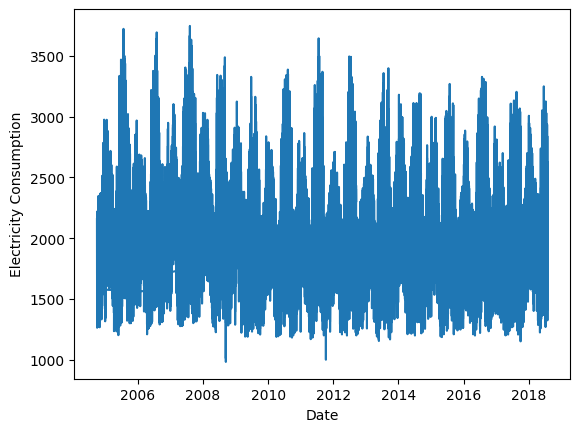

In [35]:
#Let's plot the data then
plt.plot(date_array,y)
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')

Looking at this data, we see some kind of trend. And obviously the mean is non-zero. We have to fix that.

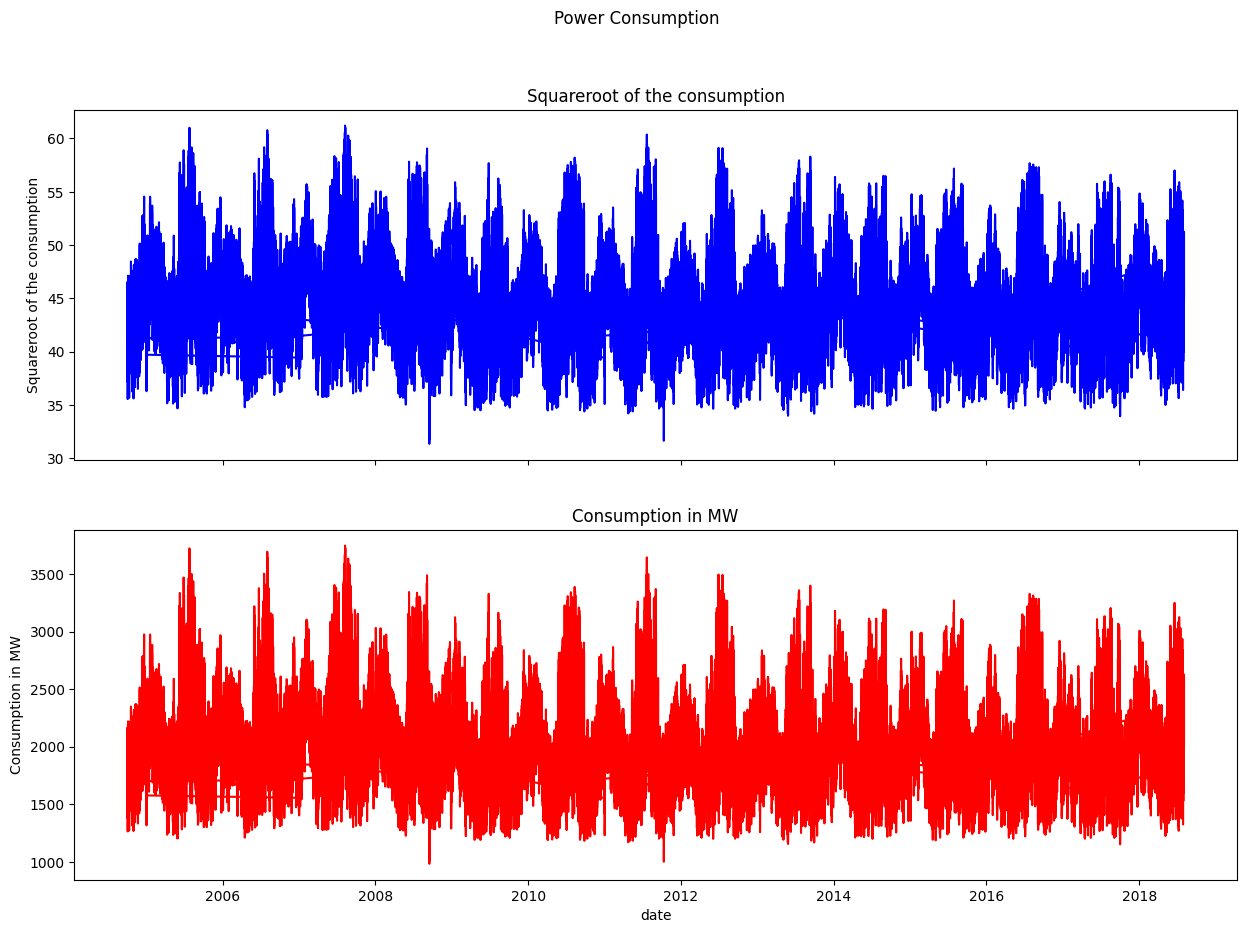

In [69]:
#Lets create subplots just because i want to learn to create subplots

fig, ax = plt.subplots(2, figsize = (15,10))
fig.suptitle('Power Consumption')
ax[0].plot(date_array ,np.sqrt(y),color = 'blue') #xlabel = 'Date', ylabel ='Squareroot of the consumption')
ax[1].plot(date_array,y, color ='red') #xlabel = 'Date',ylabel = 'Consumption in MW')
ax[0].set_title("Squareroot of the consumption")
ax[1].set_title("Consumption in MW", )
ax[0].set(xlabel = 'date', ylabel ='Squareroot of the consumption')
ax[1].set(xlabel = 'date',ylabel = 'Consumption in MW')
ax[0].label_outer()

In [57]:
#x = np.array([100,25])
#print(np.sqrt(x))
#print(type(x))

In [ ]:
#Now we detrend
